## Introduction to AI
### Text and Speech Demos

### Basic Frequency Analysis

### Load a text document

In [1]:
# Use Curl to get a document from GitHub and open it
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Moon.txt -o Moon.txt
doc1 = open("Moon.txt", "r")

# Read the document and print its contents
doc1Txt = doc1.read()
print(doc1Txt)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1589  100  1589    0     0   1338      0  0:00:01  0:00:01 --:--:--  1339
We set sail on this new sea because there is new knowledge to be gained, and new rights to be won, and they must be won and used for the progress of all people. For space science, like nuclear science and all technology, has no conscience of its own. Whether it will become a force for good or ill depends on man, and only if the United States occupies a position of pre-eminence can we help decide whether this new ocean will be a sea of peace or a new terrifying theater of war. I do not say that we should or will go unprotected against the hostile misuse of space any more than we go unprotected against the hostile use of land or sea, but I do say that space can be explored and mastered without feeding the fires of war, without repeating the mistakes that 

# Normalize the Text

In [2]:
from string import punctuation

# remove numeric digits
txt = ''.join(c for c in doc1Txt if not c.isdigit())

# remove punctuation and make lower case
txt = ''.join(c for c in txt if c not in punctuation).lower()

# print the normalized text
print(txt)

we set sail on this new sea because there is new knowledge to be gained and new rights to be won and they must be won and used for the progress of all people for space science like nuclear science and all technology has no conscience of its own whether it will become a force for good or ill depends on man and only if the united states occupies a position of preeminence can we help decide whether this new ocean will be a sea of peace or a new terrifying theater of war i do not say that we should or will go unprotected against the hostile misuse of space any more than we go unprotected against the hostile use of land or sea but i do say that space can be explored and mastered without feeding the fires of war without repeating the mistakes that man has made in extending his writ around this globe of ours
there is no strife no prejudice no national conflict in outer space as yet its hazards are hostile to us all its conquest deserves the best of all mankind and its opportunity for peaceful

# Get the Frequency Distribution

In [3]:
import nltk
import pandas as pd
from nltk.probability import FreqDist
nltk.download("punkt")

# Tokenize the text into individual words
words = nltk.tokenize.word_tokenize(txt)

# Get the frequency distribution of the words into a data frame
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']
print(count_frame)

           Count
we             9
set            1
sail           1
on             2
this           5
...          ...
accept         1
unwilling      1
postpone       1
intend         1
win            1

[152 rows x 1 columns]


[nltk_data] Downloading package punkt to /home/keshara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


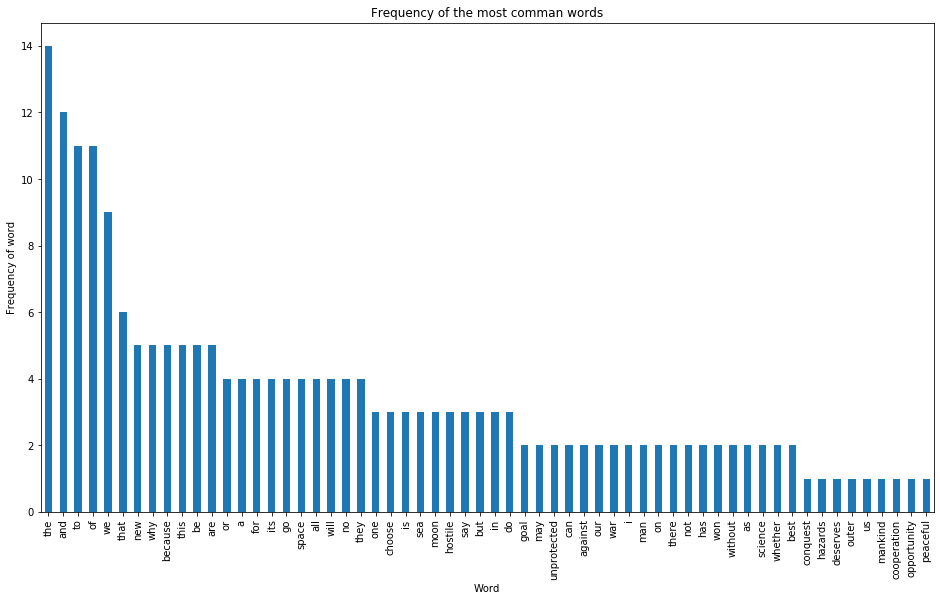

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Sort the data frame by frequency
counts = count_frame.sort_values('Count', ascending = False)

# Display the top 60 words as a bar plot
fig = plt.figure(figsize = (16, 9))
ax = fig.gca()
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most comman words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

# Remove stop words

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/keshara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


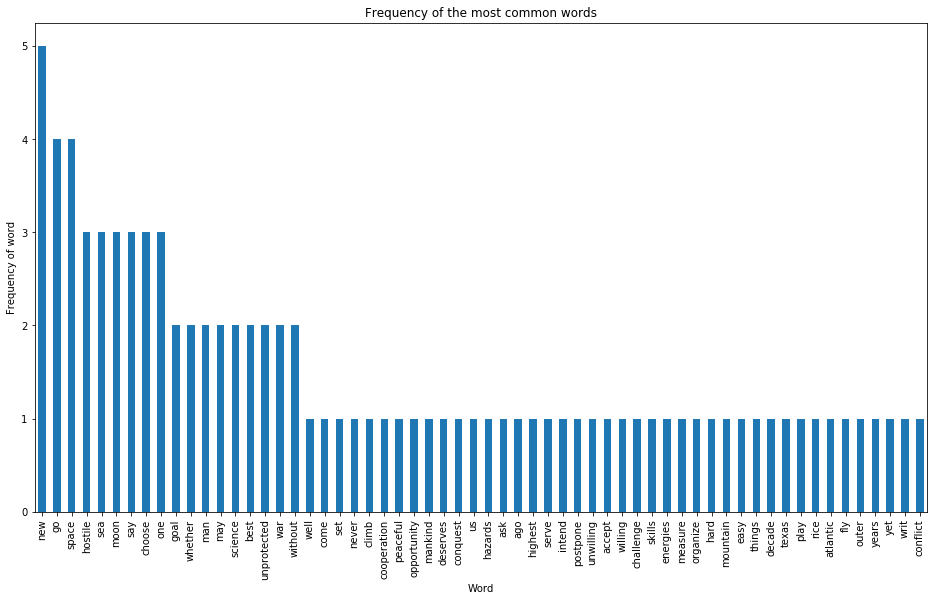

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get stamdard stop words from NLTK
nltk.download("stopwords")
from nltk.corpus import stopwords

# Filter out the stop words
txt = ' '.join([word for word in txt.split() if word not in (stopwords.words('english'))])

# Get the frequency distribution of the remaining words
words = nltk.tokenize.word_tokenize(txt)
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index = [0]).T
count_frame.columns = ['Count']

# Plot the frequency of the top 60 words
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize = (16, 9))
ax = fig.gca()
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

### View the documents

In [6]:
# remind ourselves of the first document
print(doc1Txt)
print("------------------------------------------------")

# Get a second document, normalize it, and remove stop words
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Gettysburg.txt -o Gettysburg.txt
doc2 = open("Gettysburg.txt", "r")
doc2Txt = doc2.read()
print (doc2Txt)
from string import punctuation
txt2 = ''.join(c for c in doc2Txt if not c.isdigit())
txt2 = ''.join(c for c in txt2 if c not in punctuation).lower()
txt2 = ' '.join([word for word in txt2.split() if word not in (stopwords.words('english'))])

# and a third
print("------------------------------------------------")
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Cognitive.txt -o Cognitive.txt
doc3 = open("Cognitive.txt", "r")
doc3Txt = doc3.read()
print(doc3Txt)
from string import punctuation
txt3 = ''.join(c for c in doc3Txt if not c.isdigit())
txt3 = ''.join(c for c in txt3 if c not in punctuation).lower()
txt3 = ' '.join([word for word in txt3.split() if word not in (stopwords.words('english'))])


We set sail on this new sea because there is new knowledge to be gained, and new rights to be won, and they must be won and used for the progress of all people. For space science, like nuclear science and all technology, has no conscience of its own. Whether it will become a force for good or ill depends on man, and only if the United States occupies a position of pre-eminence can we help decide whether this new ocean will be a sea of peace or a new terrifying theater of war. I do not say that we should or will go unprotected against the hostile misuse of space any more than we go unprotected against the hostile use of land or sea, but I do say that space can be explored and mastered without feeding the fires of war, without repeating the mistakes that man has made in extending his writ around this globe of ours.
There is no strife, no prejudice, no national conflict in outer space as yet. Its hazards are hostile to us all. Its conquest deserves the best of all mankind, and its opportu

### Get TF-IDF Values for the top three words in each document

In [7]:
# install textblob library and define functions for TF-IDF
#!pip install -U textblob
import math
from textblob import TextBlob as tb

def tf(word, doc):    # term frequency
    return doc.words.count(word) / len(doc.words)

def contains(word, doc):       # figure ot if a word is in there
    return sum(1 for doc in docs if word in doc.words)
    
def idf(word, docs):     # calculates inverse document frequency
    return math.log(len(docs) / (1 + contains(word, docs)))

def tfidf(word, doc, docs):   # gets tf and multiply by idf
    return tf(word,doc) * idf(word, docs)

# Create a collection of documents as textblobs
doc1 = tb(txt)
doc2 = tb(txt2)
doc3 = tb(txt3)
docs = [doc1, doc2, doc3]

# Use TF-IDF to get the three most important words from each document
print('---------------------------------------------------')
for i, doc in enumerate(docs):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, doc, docs) for word in doc.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:3]:
        print("\tword: {}, TF-IDF: {}".format(word, round(score, 5)))

---------------------------------------------------
Top words in document 1
	word: space, TF-IDF: 0.01193
	word: go, TF-IDF: 0.01193
	word: sea, TF-IDF: 0.00894
Top words in document 2
	word: nation, TF-IDF: 0.01662
	word: dedicated, TF-IDF: 0.01329
	word: great, TF-IDF: 0.00997
Top words in document 3
	word: services, TF-IDF: 0.02134
	word: microsoft, TF-IDF: 0.01423
	word: cognitive, TF-IDF: 0.01423


### Stemming
#### View frequency of unstemmed words from Kennedy's inauguration speech

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7602  100  7602    0     0   6769      0  0:00:01  0:00:01 --:--:--  6769
Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens:

We observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn before you and Almighty God the same solemn oath our forebears prescribed nearly a century and three-quarters ago.
The world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of t

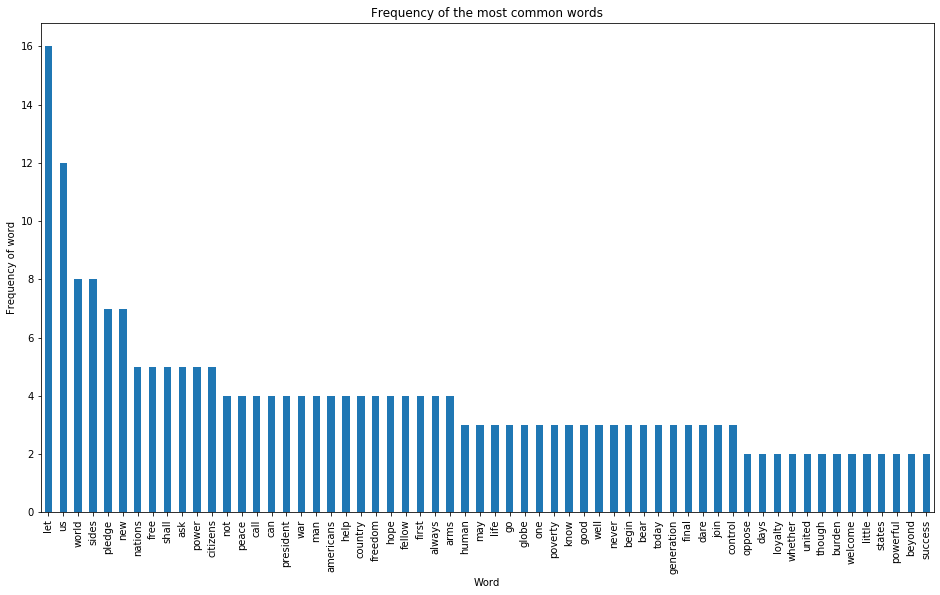

In [22]:
# Load and print text

!curl https://raw.githubusercontent.com/kesharaJayasinghe/MAML/master/Text-Speech-Demo/KennedyInaugural.txt -o KennedyInaugural.txt
doc4 = open("KennedyInaugural.txt", "r")
kenTxt = doc4.read()
print(kenTxt)

# Normalize  and remove stop words
from string import punctuation
kenTxt = ''.join(c for c in kenTxt if not c.isdigit())
kenTxt = ''.join(c for c in kenTxt if c not in punctuation).lower()
kenTxt = ' '.join([word for word in kenTxt.split()if word not in(stopwords.words('english'))])

# Get frequency distribuution
words = nltk.tokenize.word_tokenize(kenTxt)
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot frequency
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

### Stem the words using the Porter stemmer

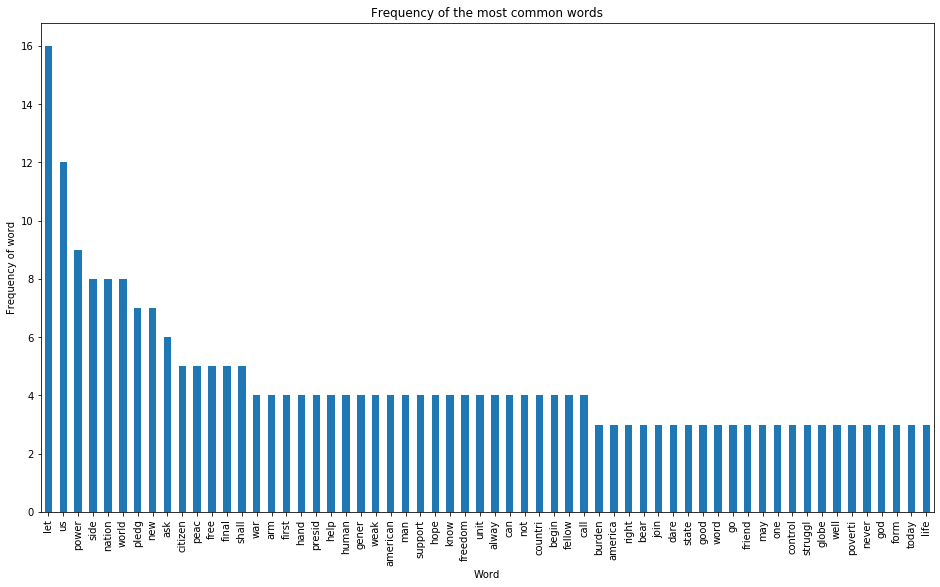

In [23]:
from nltk.stem.porter import PorterStemmer

# Get the word stems
ps = PorterStemmer()
stems = [ps.stem(word) for word in words]

# Get Frequency distribution
fdist = FreqDist(stems)
count_frame = pd.DataFrame(fdist, index = [0]).T
count_frame.columns = ['Count']

# Plot frequency
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

### Lingustic Analytics